# Data Exploration and Preprocessing

In this notebook, we will load the CIFAR-10 dataset, visualize some images, and prepare the data for training.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Path to the dataset
DATA_PATH = '/Users/nim/Downloads/cifar-10-batches-py'

def load_batch(file_path):
    with open(file_path, 'rb') as f:
        data_dict = pickle.load(f, encoding='bytes')
    return data_dict

def load_cifar10(data_path):
    train_data = []
    train_labels = []
    
    # Load training batches
    for i in range(1, 6):
        file_name = os.path.join(data_path, f'data_batch_{i}')
        batch = load_batch(file_name)
        train_data.append(batch[b'data'])
        train_labels += batch[b'labels']
        
    train_data = np.concatenate(train_data)
    train_labels = np.array(train_labels)
    
    # Load test batch
    test_batch = load_batch(os.path.join(data_path, 'test_batch'))
    test_data = test_batch[b'data']
    test_labels = np.array(test_batch[b'labels'])
    
    # Load label names
    meta_data = load_batch(os.path.join(data_path, 'batches.meta'))
    label_names = [label.decode('utf-8') for label in meta_data[b'label_names']]
    
    # Reshape data to (N, 32, 32, 3)
    # CIFAR-10 data is stored as (N, 3072) where 3072 = 32*32*3 (R, G, B)
    # We need to reshape to (N, 3, 32, 32) then transpose to (N, 32, 32, 3)
    train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    
    return (train_data, train_labels), (test_data, test_labels), label_names

(X_train, y_train), (X_test, y_test), label_names = load_cifar10(DATA_PATH)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Label names: {label_names}')

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


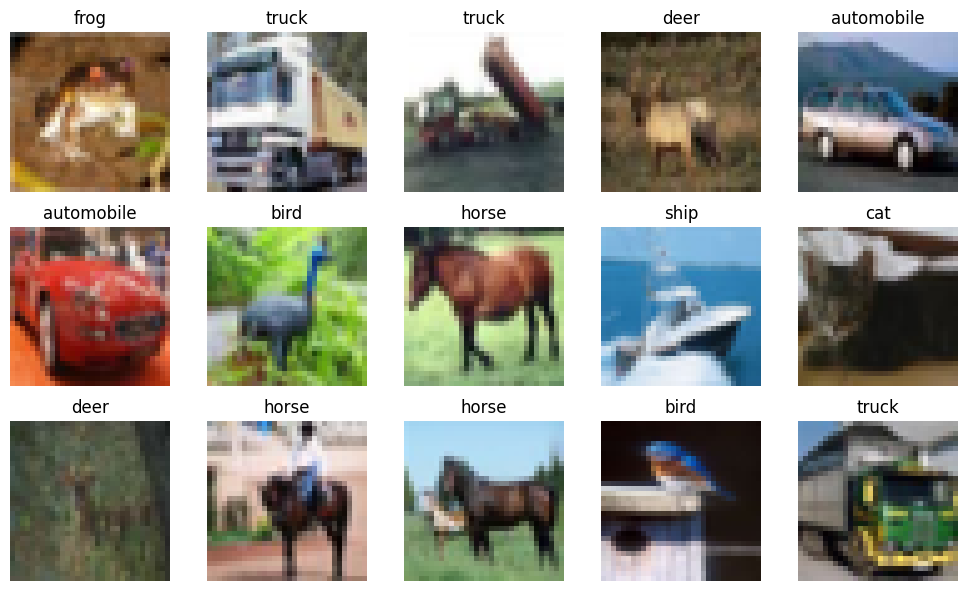

In [2]:
# Visualize some images
def plot_images(images, labels, classes, rows=3, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()
    
    for i in range(rows * cols):
        img = images[i]
        label = labels[i]
        class_name = classes[label]
        
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis('off')
        
    plt.tight_layout()
    plt.show()

plot_images(X_train, y_train, label_names)

In [3]:
# Preprocessing: Normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print('Data normalized to range [0, 1]')

Data normalized to range [0, 1]
